ONE LAYER

In [1]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)


mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa18.mat")

print(mat_data["C"][0])



[array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         6.42740394e-004, 6.10910320e-004, 5.80656549e-004],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [9.48571063e-001, 8.94820508e-001, 8.44115714e-001, ...,
         3.88815240e-004, 3.66783116e-004, 3.45999437e-004],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         5.91954733e-176, 5.09093362e-176, 4.37830863e-176],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])
 array([[5.51901019e-004, 5.24569533e-004, 4.98591569e-004, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+0

In [2]:
import NeuralNMF
print(NeuralNMF.__file__)

c:\Users\ASUS\Downloads\repo\code\.venv\lib\site-packages\NeuralNMF\__init__.py


In [4]:
mat_data["S"][0][0].shape

(81, 6012)

In [5]:
train__ = mat_data["S"][0][0]

train__ = torch.tensor(train__)

In [6]:
opto = mat_data["opt"][0][0]

In [7]:
opto

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
m, k1 = 81, 3
net = Neural_NMF([m, k1])

In [9]:
history = train(net, train__, epoch=10, lr=500, supervised=False)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


In [10]:
history[1][0].shape

torch.Size([3, 6012])

In [11]:
A = history[0][0]
B = history[1][0]

In [12]:
A

Parameter containing:
tensor([[2.0680e+00, 0.0000e+00, 3.2406e-01],
        [1.2664e+00, 1.7404e-01, 2.1862e-01],
        [3.9302e+00, 0.0000e+00, 5.1608e-01],
        [0.0000e+00, 4.1063e+00, 0.0000e+00],
        [0.0000e+00, 3.7009e-02, 9.4040e-02],
        [0.0000e+00, 1.6443e-01, 7.7927e-02],
        [3.0694e+00, 4.0472e-01, 2.4568e-01],
        [4.0816e-02, 3.3307e-02, 1.5862e-01],
        [4.6104e-01, 3.4962e-01, 4.6173e-01],
        [4.4298e-02, 6.0841e-01, 3.1152e-02],
        [9.8397e-01, 1.6082e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.6016e+00],
        [2.7571e-01, 0.0000e+00, 1.0118e+00],
        [4.8133e-02, 2.4421e-01, 0.0000e+00],
        [2.5287e-02, 5.6587e-02, 2.3918e-01],
        [0.0000e+00, 3.9332e-01, 1.4025e-01],
        [0.0000e+00, 2.8132e-01, 2.0227e-01],
        [3.8132e-01, 8.4423e-02, 2.8213e+00],
        [1.9532e-01, 0.0000e+00, 1.5247e-01],
        [1.2454e+00, 0.0000e+00, 1.4714e-01],
        [1.2371e-02, 0.0000e+00, 5.7001e-02],
        [2.3

In [13]:
B

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64,
       grad_fn=<LsqNonnegFBackward>)

In [14]:
A1 = A.detach().numpy()
B1 = B.detach().numpy()

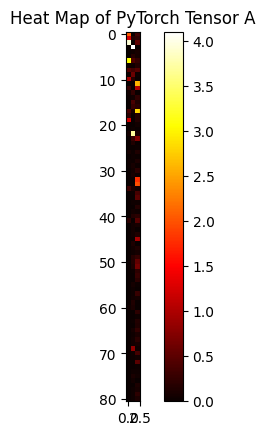

In [15]:
plt.imshow(A1, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

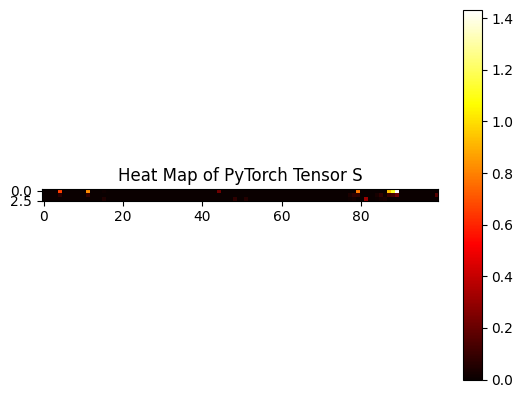

In [16]:
plt.imshow(B1[:,100:200], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [17]:
import numpy as np
opto = np.array(opto)

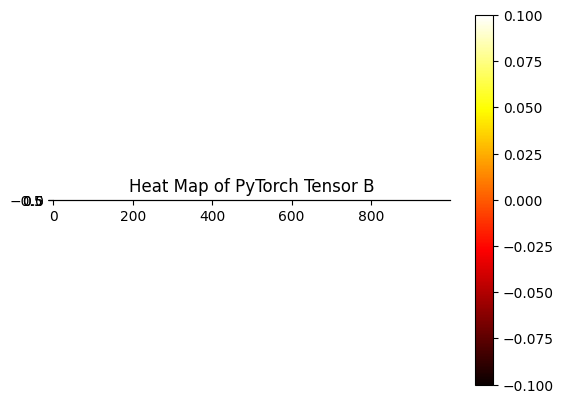

In [18]:
plt.imshow(opto[:,2000:3000], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor B')
plt.show()

In [19]:
A1

array([[2.06797134e+00, 0.00000000e+00, 3.24060202e-01],
       [1.26638809e+00, 1.74041136e-01, 2.18615774e-01],
       [3.93020039e+00, 0.00000000e+00, 5.16082145e-01],
       [0.00000000e+00, 4.10628578e+00, 0.00000000e+00],
       [0.00000000e+00, 3.70092973e-02, 9.40403844e-02],
       [0.00000000e+00, 1.64434110e-01, 7.79274533e-02],
       [3.06944002e+00, 4.04722091e-01, 2.45678658e-01],
       [4.08155915e-02, 3.33072507e-02, 1.58619223e-01],
       [4.61036920e-01, 3.49623786e-01, 4.61734655e-01],
       [4.42978341e-02, 6.08409928e-01, 3.11516717e-02],
       [9.83974013e-01, 1.60818703e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.60156357e+00],
       [2.75709257e-01, 0.00000000e+00, 1.01181046e+00],
       [4.81327643e-02, 2.44205085e-01, 0.00000000e+00],
       [2.52872584e-02, 5.65866898e-02, 2.39180449e-01],
       [0.00000000e+00, 3.93317647e-01, 1.40245915e-01],
       [0.00000000e+00, 2.81320562e-01, 2.02274638e-01],
       [3.81323765e-01, 8.44234

In [20]:
count_ones = np.count_nonzero(opto == 1)
count_ones

95

In [21]:
opto.shape

(1, 6012)

In [22]:
B1.shape

(3, 6012)

In [23]:
indices = np.where(opto == 1)[1]

In [24]:
indices

array([3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3416,
       3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3714, 3715,
       3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 4012, 4013, 4014,
       4015, 4016, 4017, 4018, 4019, 4020, 4310, 4311, 4312, 4313, 4314,
       4315, 4316, 4317, 4318, 4608, 4609, 4610, 4611, 4612, 4613, 4614,
       4615, 4616, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914,
       5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5212, 5501, 5502,
       5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5799, 5800, 5801,
       5802, 5803, 5804, 5805, 5806, 5807, 5808], dtype=int64)

In [25]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= B1.shape[1]:
        slices.append(B1[:, idx:idx+20])
    else:
        slices.append(B1[:, idx:])

In [26]:
C = np.hstack(slices) if slices else np.array([])

In [27]:
C.shape

(3, 1900)

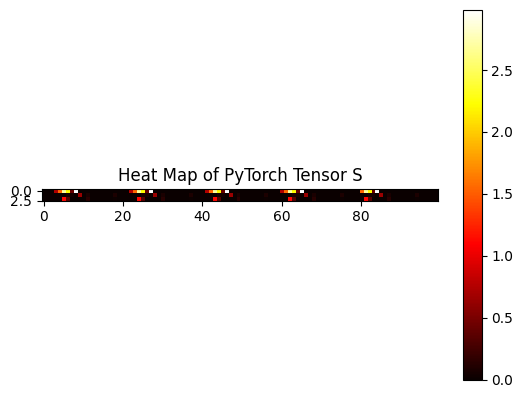

In [28]:
plt.imshow(C[:,:100], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [29]:
A.shape

torch.Size([81, 3])

In [30]:
train__.shape

torch.Size([81, 6012])

In [31]:
slices2 = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= train__.shape[1]:
        slices2.append(train__[:, idx:idx+20])
    else:
        slices2.append(train__[:, idx:])

In [32]:
C1 = np.hstack(slices2) if slices2 else np.array([])

In [33]:
C1.shape

(81, 1900)

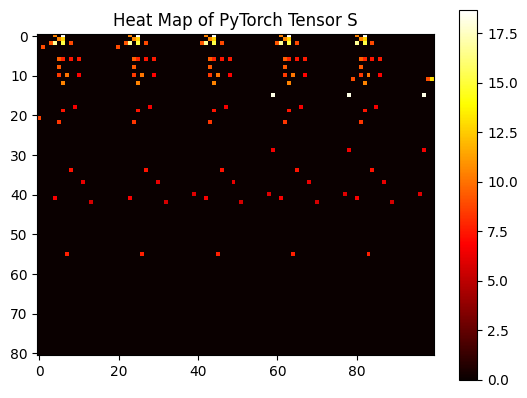

In [34]:
plt.imshow(C1[:,200:300], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

STOP HERE

In [189]:
m1, k2 = 101, 40
net1 = Neural_NMF([m1, k2])

In [190]:
history1 = train(net1, train__, epoch=10, lr=500, supervised=False)

100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


In [191]:
A2 = history1[0][0]
B2 = history1[1][0]
A3 = A2.detach().numpy()
B3 = B2.detach().numpy()

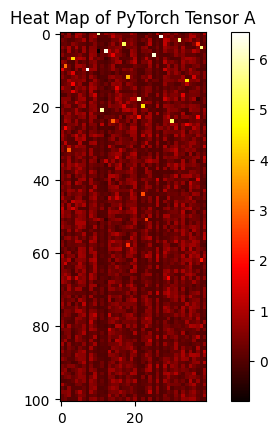

In [192]:
plt.imshow(A3, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [193]:
Ex = train__[:, indices[0]:indices[0]+40]

In [194]:
Ex.shape

torch.Size([101, 40])

In [195]:
i = 51
Ex = train__[:, indices[i]:indices[i]+40]
diff = A2 - Ex
l2 = torch.norm(diff,p=2)
l2


tensor(71.1596, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

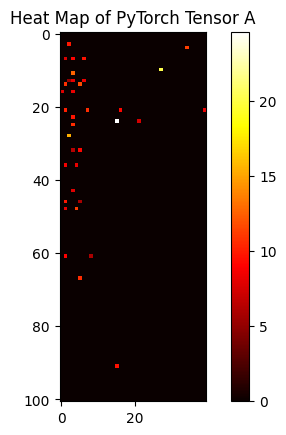

In [196]:
plt.imshow(Ex, cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()

In [197]:
j = 7
diff2 = A2 - train__[:,40*j:40*j+40]
l2_ = torch.norm(diff2,p=2)
l2_

tensor(63.2942, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)

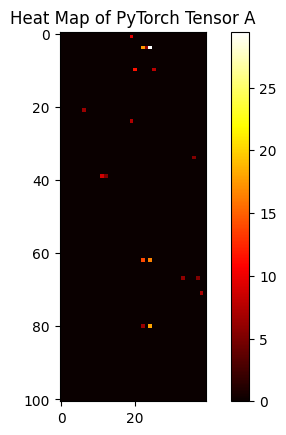

In [198]:
plt.imshow(train__[:,40*j:40*j+40], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor A')
plt.show()